In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
# Load dataset
df = pd.read_excel('1730285881-Airbnb_Open_Data.xlsx')

In [7]:
# Data Cleaning Steps:

# 1. Remove duplicate rows
df.drop_duplicates(inplace=True)

In [8]:
# 2. Remove unnecessary columns if they exist
for col in ['house_rules', 'license']:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

In [11]:
# 3. Clean currency columns (price and service fee) by removing '$' and ',' then convert to float
for col in ['price', 'service fee']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(r'[$,]', '', regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')

# 4. Rename columns for clarity
df.rename(columns={'price': 'price_$', 'service fee': 'service_fee_$'}, inplace=True)

# 5. Drop rows with missing critical data for analysis
df.dropna(subset=['price_$', 'last review', 'room type', 'host id', 'number of reviews'], inplace=True)

In [10]:
print(df.columns)

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price_$', 'service_fee_$', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')


In [14]:
# 6. Convert date and numeric columns to appropriate types
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')
df['Construction year'] = pd.to_numeric(df['Construction year'], errors='coerce', downcast='integer')
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)

In [13]:
print(df.columns)

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price_$', 'service_fee_$', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')


In [15]:
# 7. Correct known typos (example: 'brookln' to 'Brooklyn')
df.loc[df['neighbourhood group'].str.lower() == 'brookln', 'neighbourhood group'] = 'Brooklyn'

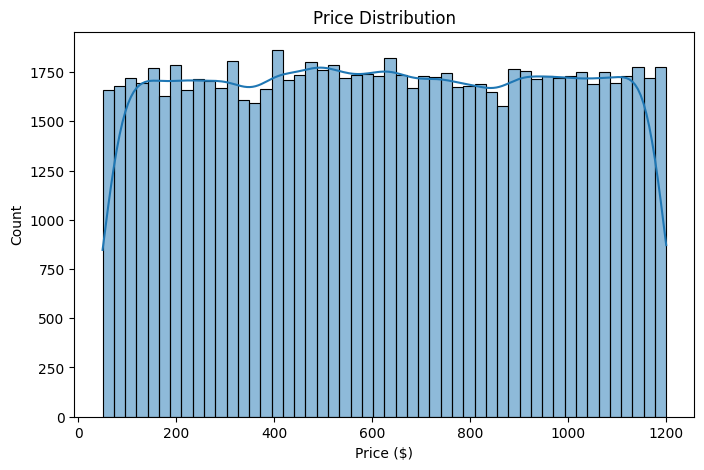

In [16]:
# Data is now clean; proceed to visualization

# Visualization 1: Price Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['price_$'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.show()

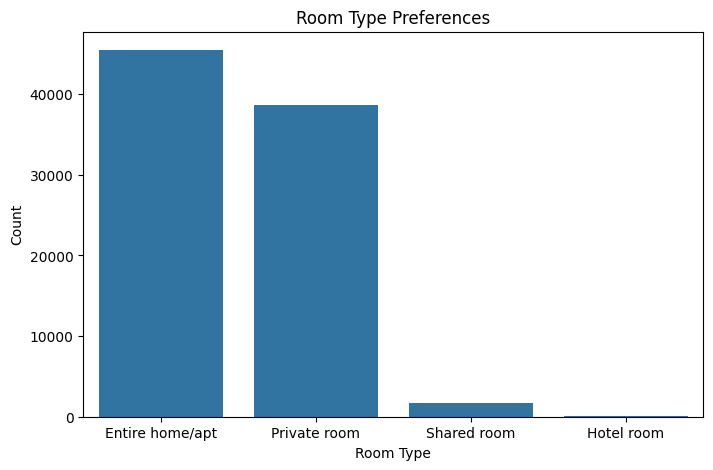

In [22]:
# Visualization 2: Room Type Preferences
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='room type', order=df['room type'].value_counts().index)
plt.title('Room Type Preferences')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

In [21]:
print(df.columns)

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price_$', 'service_fee_$', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')


In [24]:
print(df.columns)

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price_$', 'service_fee_$', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')


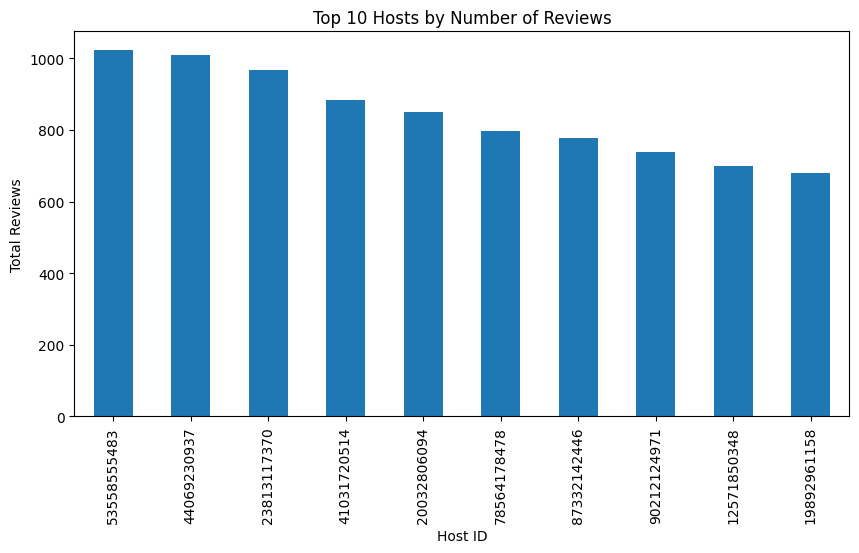

In [28]:
# Visualization 3: Top 10 Hosts by Number of Reviews
host_reviews = df.groupby('host id')['number of reviews'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
host_reviews.plot(kind='bar')
plt.title('Top 10 Hosts by Number of Reviews')
plt.xlabel('Host ID')
plt.ylabel('Total Reviews')
plt.show()

In [27]:
print(df.columns)

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price_$', 'service_fee_$', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')


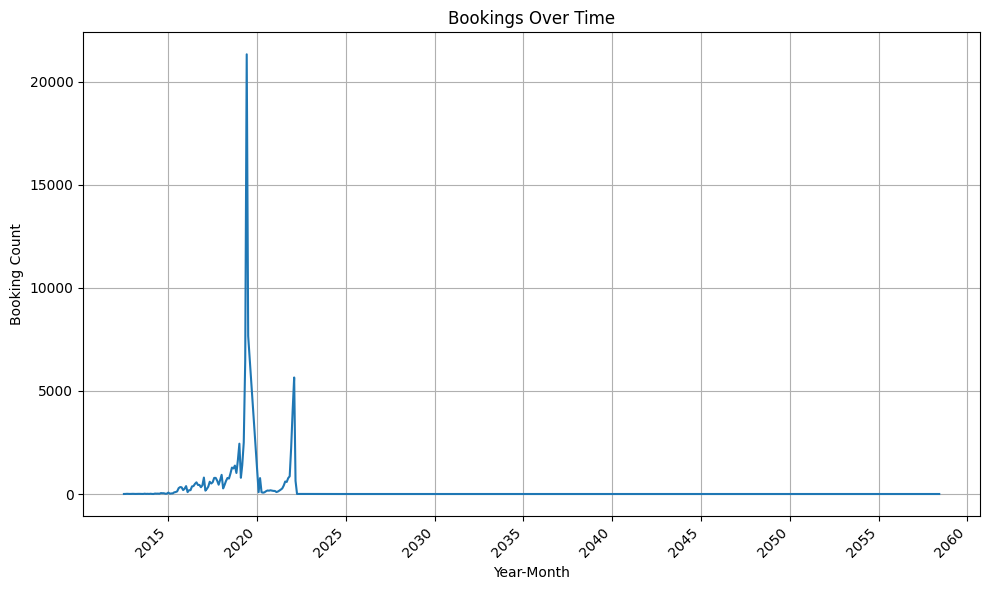

In [29]:
# Visualization 4: Bookings Over Time
df['reviews per month'] = df['last review'].dt.to_period('M')
bookings_by_month = df.groupby('reviews per month').size()
bookings_by_month.index = bookings_by_month.index.to_timestamp()
plt.figure(figsize=(10, 6))
bookings_by_month.plot()
plt.title('Bookings Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Booking Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()